# ...

...<br>

Author(s): *Martin Fränzl*

## Required Packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import importlib
import pqreader.pqreader as pq # import package from local directory
importlib.reload(pq)

<module 'pqreader.pqreader' from 'C:\\Users\\mona\\Desktop\\pqreader\\pqreader\\pqreader.py'>

In [2]:
plt.rcParams.update({'font.size' : 14,
                     'axes.labelpad' : 10,
                     'xtick.major.pad': 8,
                     'xtick.major.size': 6,
                     'xtick.major.width': 1,
                     'ytick.major.size': 6,
                     'ytick.major.width': 1,
                     'xtick.minor.size': 3,
                     'xtick.minor.width': 1,
                     'ytick.minor.size': 3,
                     'ytick.minor.width': 1,
                     'axes.linewidth': 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1.5,})

In [3]:
hist, bins, _ = pq.thd_reader('Data/Nile_Blue_Glycerol.thd')

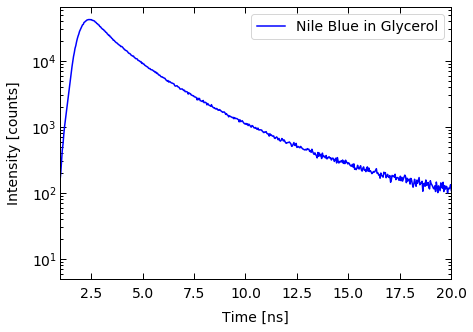

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.semilogy(bins*1e9, hist, 'b', label='Nile Blue in Glycerol')
ax.set_xlim(1, 20)
ax.set_ylim(5, 2**16)
ax.set_xlabel('Time [ns]')
ax.set_ylabel('Intensity [counts]')
ax.legend();

## Read T3R File

In [227]:
timetags, route, data, metadata = pq.t3r_reader('Data/RotatingPolarizer.t3r')

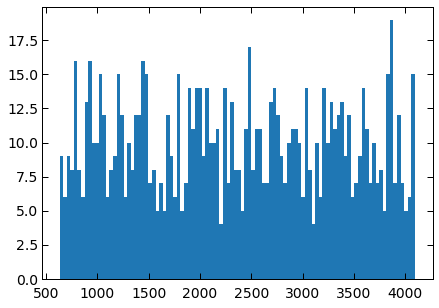

In [231]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.hist(data[:1000], bins=100);

In [232]:
timetags.size

392637

In [233]:
route.size

392637

In [234]:
data.size

392637

In [235]:
timetag_unit = metadata['timetag_unit']

In [236]:
timetags[:10]*timetag_unit*1e9

array([12900., 20900., 27100., 35900., 37300., 39600., 40300., 60500.,
       62300., 66100.])

(0, 1.5)

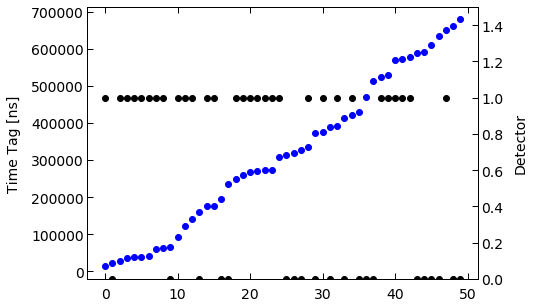

In [237]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,5))
ax2 = ax1.twinx() 
ax1.plot(timetags[:50]*timetag_unit*1e9, 'bo')
ax2.plot(route[:50], 'ko')
ax1.set_ylabel('Time Tag [ns]')
ax2.set_ylabel('Detector')
ax2.set_ylim(0,1.5)

In [238]:
t0 = timetags[np.where(route==0)]
t1 = timetags[np.where(route==1)]

In [239]:
aa = np.correlate(t0[:100], t1[:100], "full")

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(1.0, 10000)

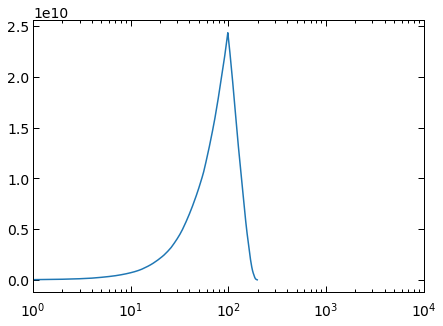

In [240]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.semilogx(aa)
ax.set_xlim(0, 10000)

In [241]:
t1[:100]*timetag_unit*1e9

array([  12900.,   27100.,   35900.,   37300.,   39600.,   40300.,
         60500.,   62300.,   93500.,  121900.,  141100.,  174900.,
        175300.,  247900.,  260000.,  268900.,  271700.,  272900.,
        274100.,  306900.,  335700.,  375100.,  391300.,  422300.,
        523100.,  530100.,  568900.,  573500.,  577300.,  650300.,
        696900.,  745900.,  749100.,  779900.,  820300.,  840500.,
        846900.,  862100.,  870700.,  889700.,  896100.,  905900.,
        930300.,  960700., 1050500., 1057500., 1100700., 1145100.,
       1195900., 1226700., 1229100., 1233500., 1348100., 1363100.,
       1411500., 1429300., 1442700., 1462300., 1485700., 1504500.,
       1532500., 1533100., 1540500., 1541900., 1550700., 1576500.,
       1603900., 1696300., 1696900., 1713800., 1728700., 1733700.,
       1783500., 1890500., 1975300., 2003700., 2043500., 2112900.,
       2127300., 2164300., 2190900., 2259100., 2273500., 2275100.,
       2316700., 2323300., 2339300., 2356500., 2388300., 23939

In [242]:
import multipletau

In [243]:
from scipy.stats import binned_statistic

In [284]:
t0[:165015]

array([     209,      661,     1611, ..., 99955800, 99963795, 99977086],
      dtype=uint64)

In [360]:
t0_bined, _ = np.histogram(t0[80000:90000], bins=1000)
t1_bined, _ = np.histogram(t1[80000:90000], bins=1000)

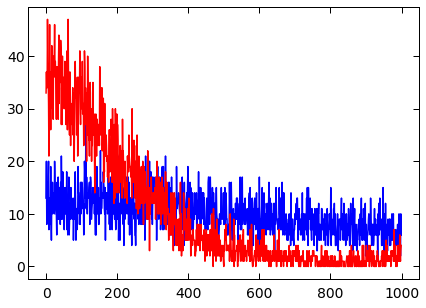

In [361]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(t0_bined, 'b')
ax.plot(t1_bined, 'r')
#ax.set_xlim(0,1000)

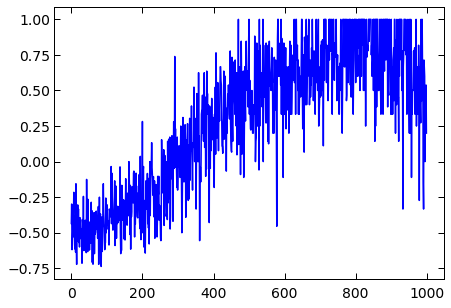

In [365]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot((t0_bined-t1_bined)/(t0_bined+t1_bined), 'b')
#ax.plot(, 'r')

In [366]:
ab = np.correlate(t1_bined, t0_bined, "full")

(0.001, 1000)

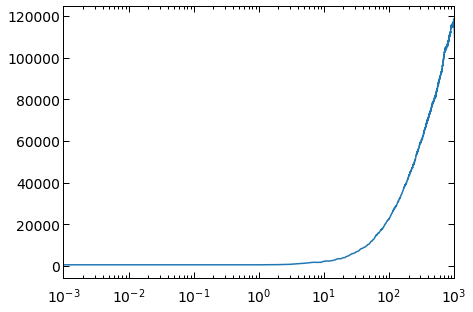

In [367]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.semilogx(ab)
ax.set_xlim(0.001, 1000)

In [368]:
aa = multipletau.autocorrelate(t0[80000:90000]*timetag_unit*1e9, deltat=100)
ab = multipletau.correlate(t1[80000:90000]*timetag_unit*1e9, t0[80000:90000]*timetag_unit*1e9, deltat=100)

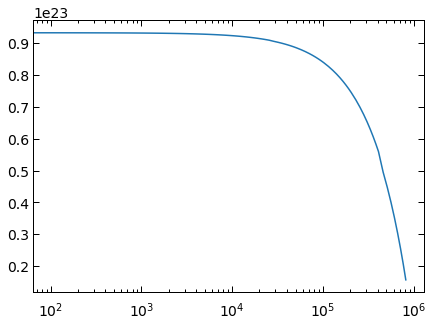

In [369]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
#ax.semilogx(aa.T[0], aa.T[1])
ax.semilogx(ab.T[0], ab.T[1])